# Testing the Deployed Model

## 1. Loading the Model

In [1]:
import pickle

In [2]:
# Step 1: Load the trained model from a pickle file
def load_model(model_filename):
    try:
        with open(model_filename, 'rb') as model_file:
            model = pickle.load(model_file)
        return model
    except Exception as e:
        print(f"Error loading model from {model_filename}: {str(e)}")
        return None

## 2. Defining a Function for Prediction of the data

In [3]:
# Step 2: Make predictions using the loaded model
def predict_stock_price(model, input_data):
    try:
        # Ensure input_data is in the same format as used for training
        # You may need to preprocess it accordingly

        # Make predictions
        predictions = model.predict(input_data)
        return predictions
        
    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        return None

## 3. Data Collection

In [4]:
import pandas

df = pandas.read_csv('HDFCBANK_Recent.csv')
df['Date'] = pandas.to_datetime(df['Date'])

## 4. Feature Engineering to make it similar to the model

In [5]:
# Calculate the feature 'Yesterday_Close' by shifting 'Close' by one day
df['Yesterday_Close'] = df['Close'].shift(1)

# Drop the first row since it will have NaN values in 'Yesterday_Close'
df = df.dropna()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Yesterday_Close
1,2023-09-04,1590.000000,1591.449951,1574.900024,1584.550049,1584.550049,12536819,1574.699951
2,2023-09-05,1588.400024,1588.400024,1570.599976,1574.900024,1574.900024,19356041,1584.550049
3,2023-09-06,1576.800049,1600.000000,1574.900024,1595.500000,1595.500000,28160455,1574.900024
4,2023-09-07,1595.500000,1614.000000,1587.150024,1610.849976,1610.849976,17104171,1595.500000
5,2023-09-08,1608.300049,1632.900024,1607.599976,1623.400024,1623.400024,17251105,1610.849976


## 5. Prediction

In [6]:
if __name__ == "__main__":
    # Step 1: Load the trained model
    model_filename = 'lag.pkl'  # Replace with the actual file path
    loaded_model = load_model(model_filename)

    if loaded_model:
        # Step 3: Prepare input data for prediction
        input_data = df[['Yesterday_Close', 'Open', 'High', 'Low', 'Adj Close']]  # Replace with your feature values

        # Step 4: Make predictions
        predictions = predict_stock_price(loaded_model, input_data)
        
        if predictions is not None:
            for prediction in predictions:
                print(f"Predicted stock price: {prediction}")

Predicted stock price: 1585.6990347625465
Predicted stock price: 1578.6369610904749
Predicted stock price: 1598.41313731584
Predicted stock price: 1609.6911939707802
Predicted stock price: 1629.7422004076466
Predicted stock price: 1635.5179960855348
Predicted stock price: 1636.5866073217314
Predicted stock price: 1648.256617064335
Predicted stock price: 1645.7479430628632
Predicted stock price: 1668.633800020033
Predicted stock price: 1634.3825621307492
Predicted stock price: 1568.5158326611195
Predicted stock price: 1556.4433905405426
Predicted stock price: 1537.2962686774356
Predicted stock price: 1539.7432833424689
Predicted stock price: 1541.4238132731832
Predicted stock price: 1528.736749644858
Predicted stock price: 1528.8820482813564
Predicted stock price: 1534.7637063461734


In [ ]:
## 6. Adjusting  

In [7]:
# Including the predicted values column to the dataframe

df['Predicted_Close']=0

df['Predicted_Close'] = predictions
df[['Date', 'Yesterday_Close', 'Close', 'Predicted_Close']]

,Date,Yesterday_Close,Close,Predicted_Close
1,2023-09-04,1574.699951,1584.550049,1585.699035
2,2023-09-05,1584.550049,1574.900024,1578.636961
3,2023-09-06,1574.900024,1595.500000,1598.413137
4,2023-09-07,1595.500000,1610.849976,1609.691194
5,2023-09-08,1610.849976,1623.400024,1629.742200
6,2023-09-11,1623.400024,1631.800049,1635.517996
7,2023-09-12,1631.800049,1636.900024,1636.586607
8,2023-09-13,1636.900024,1643.900024,1648.256617
9,2023-09-14,1643.900024,1642.900024,1645.747943
10,2023-09-15,1642.900024,1661.750000,1668.633800


# Data Visualisation

In [8]:
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib can also be used here
# I use plotly for interactive representation when I run the program

In [9]:
# Create traces for original and predicted data
trace_original = go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Original', 
                            line=dict(color='blue'))
            
trace_predicted = go.Scatter(x=df['Date'], y=df['Predicted_Close'], mode='lines', name='Predicted', 
                             line=dict(color='red'))

In [10]:
# Create layout for the plot
layout = go.Layout(
    title='HDFC Stock Price Prediction',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Price'),
    width=800,
    height=400,
    showlegend=True)


# Create a figure and add the traces
fig = go.Figure(data=[trace_original, trace_predicted], layout=layout)


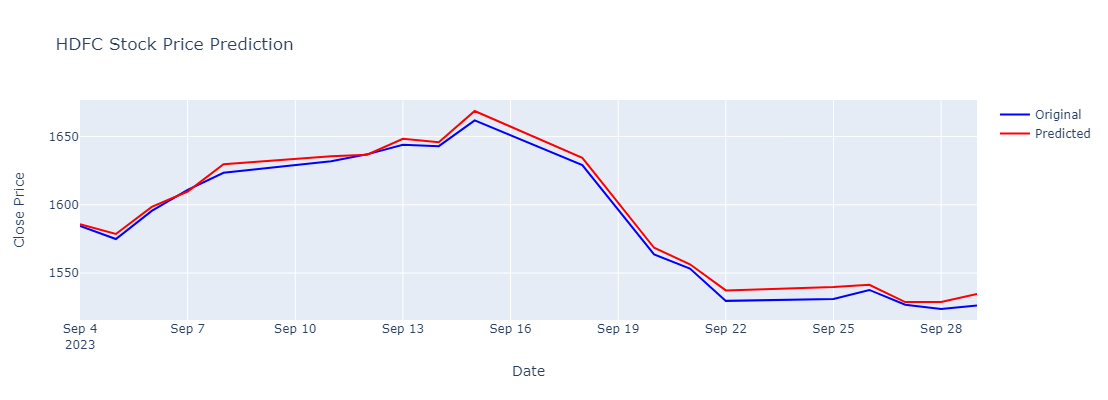

In [11]:
fig.show()